<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Impute Missing Values**


Estimated time needed: **30** minutes


In this lab, you will practice essential data wrangling techniques using the Stack Overflow survey dataset. The primary focus is on handling missing data and ensuring data quality. You will:

- **Load the Data:** Import the dataset into a DataFrame using the pandas library.

- **Clean the Data:** Identify and remove duplicate entries to maintain data integrity.

- **Handle Missing Values:** Detect missing values, impute them with appropriate strategies, and verify the imputation to create a complete and reliable dataset for analysis.

This lab equips you with the skills to effectively preprocess and clean real-world datasets, a crucial step in any data analysis project.


## Objectives


In this lab, you will perform the following:


-   Identify missing values in the dataset.

-   Apply techniques to impute missing values in the dataset.
  
-   Use suitable techniques to normalize data in the dataset.


-----


#### Install needed library


In [1]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 156.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 176.3 MB/s eta 0:00:00


### Step 1: Import Required Libraries


In [2]:
import pandas as pd

### Step 2: Load the Dataset Into a Dataframe


#### **Read Data**
<p>
The functions below will download the dataset into your browser:
</p>


In [3]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

### Step 3. Finding and Removing Duplicates
##### Task 1: Identify duplicate rows in the dataset.


In [4]:
# 1. 重複行の特定（完全一致する行）
duplicate_rows = df[df.duplicated()]

# 2. 重複行の数をカウント
duplicate_count = df.duplicated().sum()

# 3. 結果の表示
print(f"重複行の数: {duplicate_count}")
print("\n重複行のサンプル:")
print(duplicate_rows.head())  # 最初の数行を表示

重複行の数: 0

重複行のサンプル:
Empty DataFrame
Columns: [ResponseId, MainBranch, Age, Employment, RemoteWork, Check, CodingActivities, EdLevel, LearnCode, LearnCodeOnline, TechDoc, YearsCode, YearsCodePro, DevType, OrgSize, PurchaseInfluence, BuyNewTool, BuildvsBuy, TechEndorse, Country, Currency, CompTotal, LanguageHaveWorkedWith, LanguageWantToWorkWith, LanguageAdmired, DatabaseHaveWorkedWith, DatabaseWantToWorkWith, DatabaseAdmired, PlatformHaveWorkedWith, PlatformWantToWorkWith, PlatformAdmired, WebframeHaveWorkedWith, WebframeWantToWorkWith, WebframeAdmired, EmbeddedHaveWorkedWith, EmbeddedWantToWorkWith, EmbeddedAdmired, MiscTechHaveWorkedWith, MiscTechWantToWorkWith, MiscTechAdmired, ToolsTechHaveWorkedWith, ToolsTechWantToWorkWith, ToolsTechAdmired, NEWCollabToolsHaveWorkedWith, NEWCollabToolsWantToWorkWith, NEWCollabToolsAdmired, OpSysPersonal use, OpSysProfessional use, OfficeStackAsyncHaveWorkedWith, OfficeStackAsyncWantToWorkWith, OfficeStackAsyncAdmired, OfficeStackSyncHaveWorkedWith

##### Task 2: Remove the duplicate rows from the dataframe.



In [5]:
# 1. 重複行を削除（完全一致する行を対象）
df_cleaned = df.drop_duplicates()

# 2. 削除後のデータサイズを確認
original_size = df.shape[0]
new_size = df_cleaned.shape[0]

# 3. 結果の表示
print(f"元のデータサイズ: {original_size} 行")
print(f"重複削除後のデータサイズ: {new_size} 行")
print(f"削除された重複行数: {original_size - new_size}")

元のデータサイズ: 65437 行
重複削除後のデータサイズ: 65437 行
削除された重複行数: 0


### Step 4: Finding Missing Values
##### Task 3: Find the missing values for all columns.


In [6]:
# 1. 各列の欠損値の数をカウント
missing_values_count = df.isnull().sum()

# 2. 各列の欠損率（全体の行数に対する割合）を計算
missing_values_percentage = (missing_values_count / len(df)) * 100

# 3. 結果をデータフレームにまとめる
missing_values_df = pd.DataFrame({
    'Missing Values': missing_values_count,
    'Percentage (%)': missing_values_percentage
})

# 4. 欠損値がある列のみ表示
missing_values_df = missing_values_df[missing_values_df['Missing Values'] > 0]

# 結果の表示
print("欠損値のある列:")
print(missing_values_df)


欠損値のある列:
                     Missing Values  Percentage (%)
RemoteWork                    10631       16.246160
CodingActivities              10971       16.765744
EdLevel                        4653        7.110656
LearnCode                      4949        7.563000
LearnCodeOnline               16200       24.756636
...                             ...             ...
JobSatPoints_11               35992       55.002522
SurveyLength                   9255       14.143375
SurveyEase                     9199       14.057796
ConvertedCompYearly           42002       64.186928
JobSat                        36311       55.490013

[109 rows x 2 columns]


##### Task 4: Find out how many rows are missing in the column RemoteWork.


In [7]:
# RemoteWork 列の欠損値の数をカウント
missing_remote_work_count = df['RemoteWork'].isnull().sum()

# 結果を表示
print(f"RemoteWork 列の欠損行数: {missing_remote_work_count}")


RemoteWork 列の欠損行数: 10631


### Step 5. Imputing Missing Values
##### Task 5: Find the value counts for the column RemoteWork.


In [9]:
# RemoteWork 列の値の出現回数をカウント
remote_work_counts = df['RemoteWork'].value_counts()

# 結果を表示
print("RemoteWork 列の値の出現回数:")
print(remote_work_counts)


RemoteWork 列の値の出現回数:
RemoteWork
Hybrid (some remote, some in-person)    23015
Remote                                  20831
In-person                               10960
Name: count, dtype: int64


##### Task 6: Identify the most frequent (majority) value in the RemoteWork column.



In [10]:
# RemoteWork 列の最頻値（最も多く出現する値）を取得
most_frequent_remote_work = df['RemoteWork'].mode()[0]

# 結果を表示
print(f"RemoteWork の最頻値（最も多く出現する値）: {most_frequent_remote_work}")


RemoteWork の最頻値（最も多く出現する値）: Hybrid (some remote, some in-person)


##### Task 7: Impute (replace) all the empty rows in the column RemoteWork with the majority value.



In [11]:
df['RemoteWork'].fillna(most_frequent_remote_work, inplace=True)

/tmp/ipykernel_299/4009189024.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RemoteWork'].fillna(most_frequent_remote_work, inplace=True)


##### Task 8: Check for any compensation-related columns and describe their distribution.



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 140.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 124.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 89.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 117.0 MB/s eta 0:00:00
Compensation 関連列の基本統計量:
           CompTotal  ConvertedCompYearly
count   3.374000e+04         2.343500e+04
mean   2.963841e+145         8.615529e+04
std    5.444117e+147         1.867570e+05
min     0.000000e+00         1.000000e+00
25%     6.000000e+04         3.271200e+04
50%     1.100000e+05         6.500000e+04
75%     2.500000e+05         1.079715e+05
max    1.000000e+150         1.625660e+07


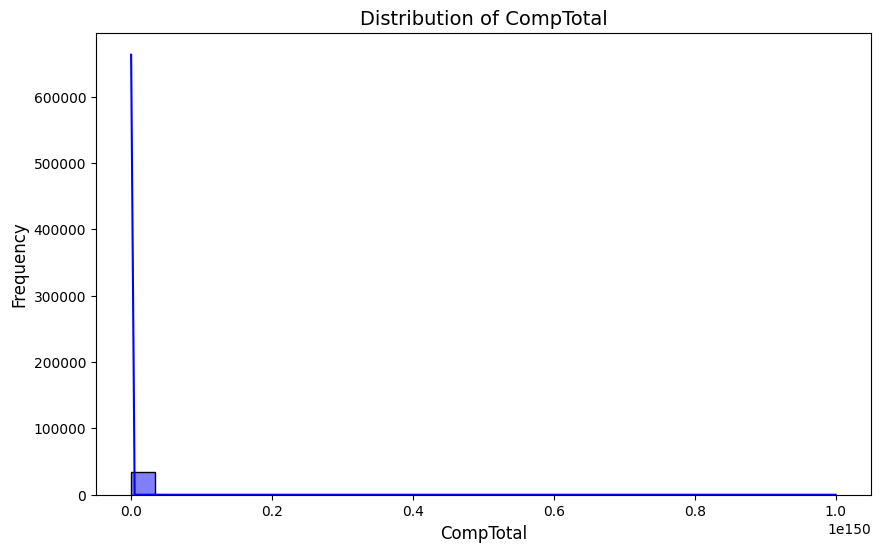

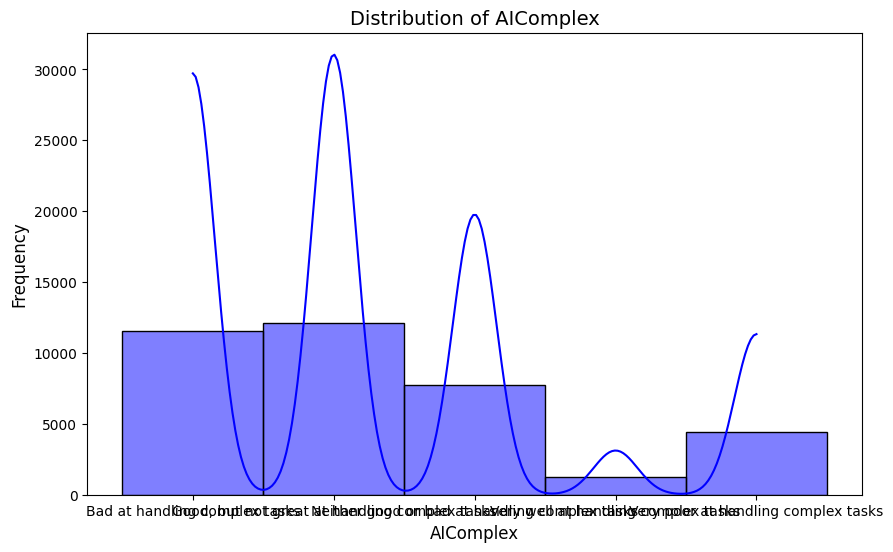

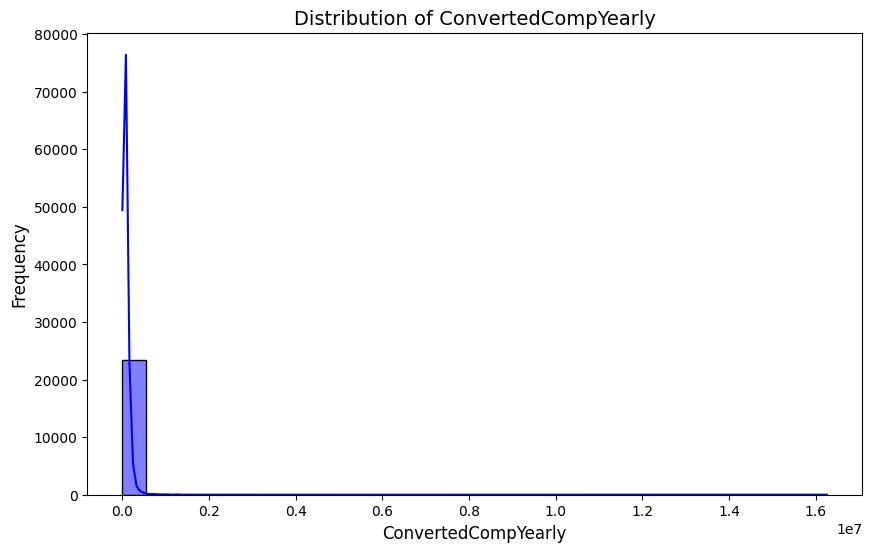

In [15]:
!pip install matplotlib seaborn

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Compensation に関連する列を特定（例: 'ConvertedCompYearly'）
compensation_columns = [col for col in df.columns if 'Comp' in col or 'Salary' in col or 'Pay' in col]

# 2. 各 Compensation 列の基本統計量を表示
print("Compensation 関連列の基本統計量:")
print(df[compensation_columns].describe())

# 3. 各 Compensation 列の分布を可視化
for column in compensation_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], bins=30, kde=True, color="blue")
    plt.title(f"Distribution of {column}", fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.show()


### Summary 


**In this lab, you focused on imputing missing values in the dataset.**

- Use the <code>pandas.read_csv()</code> function to load a dataset from a CSV file into a DataFrame.

- Download the dataset if it's not available online and specify the correct file path.



<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11-05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-09-27|1.1|Madhusudhan Moole|Updated lab|
|2024-09-26|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
